In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file_1 = ROOT.TFile.Open("run2H_NE_scalingtest_1001.root")
hist_1 = ROOT.TH1D()
hcov_1 = ROOT.TH2D()
hist_1 = file_1.Get("calo_histogram_sum_ratio")
hcov_1 = file_1.Get("hcov")
file_2 = ROOT.TFile.Open("run2H_NE_scalingtest_1002.root")
hist_2 = ROOT.TH1D()
hcov_2 = ROOT.TH2D()
hist_2 = file_2.Get("calo_histogram_sum_ratio")
hcov_2 = file_2.Get("hcov")
file_3 = ROOT.TFile.Open("run2H_NE_scalingtest_1003.root")
hist_3 = ROOT.TH1D()
hcov_3 = ROOT.TH2D()
hist_3 = file_3.Get("calo_histogram_sum_ratio")
hcov_3 = file_3.Get("hcov")
file_4 = ROOT.TFile.Open("run2H_NE_scalingtest_1004.root")
hist_4 = ROOT.TH1D()
hcov_4 = ROOT.TH2D()
hist_4 = file_4.Get("calo_histogram_sum_ratio")
hcov_4 = file_4.Get("hcov")
file_5 = ROOT.TFile.Open("run2H_NE_scalingtest_1005.root")
hist_5 = ROOT.TH1D()
hcov_5 = ROOT.TH2D()
hist_5 = file_5.Get("calo_histogram_sum_ratio")
hcov_5 = file_5.Get("hcov")
file_6 = ROOT.TFile.Open("run2H_NE_scalingtest_1006.root")
hist_6 = ROOT.TH1D()
hcov_6 = ROOT.TH2D()
hist_6 = file_6.Get("calo_histogram_sum_ratio")
hcov_6 = file_6.Get("hcov")
file_7 = ROOT.TFile.Open("run2H_NE_scalingtest_1007.root")
hist_7 = ROOT.TH1D()
hcov_7 = ROOT.TH2D()
hist_7 = file_7.Get("calo_histogram_sum_ratio")
hcov_7 = file_7.Get("hcov")
file_8 = ROOT.TFile.Open("run2H_NE_scalingtest_1008.root")
hist_8 = ROOT.TH1D()
hcov_8 = ROOT.TH2D()
hist_8 = file_8.Get("calo_histogram_sum_ratio")
hcov_8 = file_8.Get("hcov")
file_9 = ROOT.TFile.Open("run2H_NE_scalingtest_1009.root")
hist_9 = ROOT.TH1D()
hcov_9 = ROOT.TH2D()
hist_9 = file_9.Get("calo_histogram_sum_ratio")
hcov_9 = file_9.Get("hcov")

In [3]:
fit_start=30000
fit_stop=305000
fit_range=hist_1.FindBin(fit_stop)-hist_1.FindBin(fit_start)+1
y_val=np.empty(shape=(16,fit_range))
y_err=np.empty(shape=(16,fit_range))
x_val=np.empty(shape=(16,fit_range))
y_cov=np.empty(shape=(16,fit_range,fit_range))  

In [4]:
%%time
for ibin in range (0,fit_range):
    y_val[0][ibin]=hist_1.GetBinContent(ibin+hist_1.FindBin(fit_start))
    y_err[0][ibin]=hist_1.GetBinError(ibin+hist_1.FindBin(fit_start))
    x_val[0][ibin]=hist_1.GetBinCenter(ibin+hist_1.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[0][irow][icol]=hcov_1.GetBinContent(irow+hist_1.FindBin(fit_start),icol+hist_1.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[1][ibin]=hist_2.GetBinContent(ibin+hist_2.FindBin(fit_start))
    y_err[1][ibin]=hist_2.GetBinError(ibin+hist_2.FindBin(fit_start))
    x_val[1][ibin]=hist_2.GetBinCenter(ibin+hist_2.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[1][irow][icol]=hcov_2.GetBinContent(irow+hist_2.FindBin(fit_start),icol+hist_2.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[2][ibin]=hist_3.GetBinContent(ibin+hist_3.FindBin(fit_start))
    y_err[2][ibin]=hist_3.GetBinError(ibin+hist_3.FindBin(fit_start))
    x_val[2][ibin]=hist_3.GetBinCenter(ibin+hist_3.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[2][irow][icol]=hcov_3.GetBinContent(irow+hist_3.FindBin(fit_start),icol+hist_3.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[3][ibin]=hist_4.GetBinContent(ibin+hist_4.FindBin(fit_start))
    y_err[3][ibin]=hist_4.GetBinError(ibin+hist_4.FindBin(fit_start))
    x_val[3][ibin]=hist_4.GetBinCenter(ibin+hist_4.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[3][irow][icol]=hcov_4.GetBinContent(irow+hist_4.FindBin(fit_start),icol+hist_4.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[4][ibin]=hist_5.GetBinContent(ibin+hist_5.FindBin(fit_start))
    y_err[4][ibin]=hist_5.GetBinError(ibin+hist_5.FindBin(fit_start))
    x_val[4][ibin]=hist_5.GetBinCenter(ibin+hist_5.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[4][irow][icol]=hcov_5.GetBinContent(irow+hist_5.FindBin(fit_start),icol+hist_5.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[5][ibin]=hist_6.GetBinContent(ibin+hist_6.FindBin(fit_start))
    y_err[5][ibin]=hist_6.GetBinError(ibin+hist_6.FindBin(fit_start))
    x_val[5][ibin]=hist_6.GetBinCenter(ibin+hist_6.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[5][irow][icol]=hcov_6.GetBinContent(irow+hist_6.FindBin(fit_start),icol+hist_6.FindBin(fit_start))


for ibin in range (0,fit_range):
    y_val[6][ibin]=hist_7.GetBinContent(ibin+hist_7.FindBin(fit_start))
    y_err[6][ibin]=hist_7.GetBinError(ibin+hist_7.FindBin(fit_start))
    x_val[6][ibin]=hist_7.GetBinCenter(ibin+hist_7.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[6][irow][icol]=hcov_7.GetBinContent(irow+hist_7.FindBin(fit_start),icol+hist_7.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[7][ibin]=hist_8.GetBinContent(ibin+hist_8.FindBin(fit_start))
    y_err[7][ibin]=hist_8.GetBinError(ibin+hist_8.FindBin(fit_start))
    x_val[7][ibin]=hist_8.GetBinCenter(ibin+hist_8.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[7][irow][icol]=hcov_8.GetBinContent(irow+hist_8.FindBin(fit_start),icol+hist_8.FindBin(fit_start))
        

for ibin in range (0,fit_range):
    y_val[8][ibin]=hist_9.GetBinContent(ibin+hist_9.FindBin(fit_start))
    y_err[8][ibin]=hist_9.GetBinError(ibin+hist_9.FindBin(fit_start))
    x_val[8][ibin]=hist_9.GetBinCenter(ibin+hist_9.FindBin(fit_start))

for irow in range (0, fit_range):
    for icol in range(0, fit_range):
        y_cov[8][irow][icol]=hcov_9.GetBinContent(irow+hist_9.FindBin(fit_start),icol+hist_9.FindBin(fit_start))
        



CPU times: user 57.9 s, sys: 13.1 s, total: 1min 10s
Wall time: 1min 10s


In [5]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [6]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist_2.GetBinWidth(1))
T_a=2*nbinshift*hist_2.GetBinWidth(1)

asym=np.empty(16)
dasym=np.empty(16)
rval=np.empty(16)
drval=np.empty(16)
phi=np.empty(16)
dphi=np.empty(16)
A_cbo=np.empty(16)
dA_cbo=np.empty(16)
tau_cbo=np.empty(16)
dtau_cbo=np.empty(16)
omega_cbo=np.empty(16)
domega_cbo=np.empty(16)
phi_cbo=np.empty(16)
dphi_cbo=np.empty(16)
A_cbo_A=np.empty(16)
dA_cbo_A=np.empty(16)
phi_cbo_A=np.empty(16)
dphi_cbo_A=np.empty(16)
A_cbo_phi=np.empty(16)
dA_cbo_phi=np.empty(16)
phi_cbo_phi=np.empty(16)
dphi_cbo_phi=np.empty(16)
A_vw=np.empty(16)
dA_vw=np.empty(16)
tau_vw=np.empty(16)
dtau_vw=np.empty(16)
omega_vw=np.empty(16)
domega_vw=np.empty(16)
phi_vw=np.empty(16)
dphi_vw=np.empty(16)
A_y=np.empty(16)
dA_y=np.empty(16)
tau_y=np.empty(16)
dtau_y=np.empty(16)
omega_y=np.empty(16)
domega_y=np.empty(16)
phi_y=np.empty(16)
dphi_y=np.empty(16)
A_2cbo=np.empty(16)
dA_2cbo=np.empty(16)
tau_2cbo=np.empty(16)
dtau_2cbo=np.empty(16)
omega_2cbo=np.empty(16)
domega_2cbo=np.empty(16)
phi_2cbo=np.empty(16)
dphi_2cbo=np.empty(16)
calonum=np.empty(16)
red_chi2=np.empty(16)


In [7]:
def fit_func(time: np.double,
             asym: np.double = 0.0, 
             R: np.double = 0.0, 
             phi: np.double = 0.0,
             asym_cbo = 0.0,
             tau_cbo = 0.0,
             omega_cbo = 0.0,
             phi_cbo = 0.0,
             asym_cbo_A = 0.0,
             phi_cbo_A=0.0,
             A_cbo_phi= 0.0,
             phi_cbo_phi=0.0,
             asym_vw= 0.0,
             tau_vw = 0.0,
             omega_vw = 0.0,
             phi_vw = 0.0,
             asym_vbo= 0.0,
             tau_vbo = 0.0,
             omega_vbo = 0.0,
             phi_vbo = 0.0,
             asym_2cbo= 0.0,
             phi_2cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    N2cbo=(asym_2cbo*exp(-2*time/tau_cbo)*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-2*(time + T_a/2)/tau_cbo)*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-2*(time - T_a/2)/tau_cbo)*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    
    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [8]:
p_init=[2.28839e-01,
        0.000000,
        4.02000e+00,
        2.42604e-03,
        2.70e+05,
        2.3404e-03,
        5.56481e-01,
        6.91318e-04,
        5.78e+00,
        6.39e-05,
        3.52e+01,
        2.36e-04,
        175334,
        1.393e-02,
        2.73e-01,
        1.001e-03,
        28138,
        1.4037e-02,
        1.5,
        1.106e-04,
        3.06e+00]

In [9]:
scaling=[1.001,1.002,1.003,1.004,1.005,1.006,1.007,1.008,1.009]

In [10]:
%%time
for icalo in range(0,9): 
    
    pars23, cov23 = opt.curve_fit(f=fit_func, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init, sigma=y_err[icalo])

    p_init_final=pars23
    
    pars2, cov_final = opt.curve_fit(f=fit_func, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    chi2=np.dot((np.transpose(y_val[icalo]-fit_func(x_val[icalo], *pars2))),(np.dot((np.linalg.inv(y_cov[icalo])),(y_val[icalo]-fit_func(x_val[icalo], *pars2)))))
    red_chi2[icalo]=chi2/(fit_range-len(pars2))
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    A_cbo[icalo]=pars2[3]
    dA_cbo[icalo]=stdevs[3]
    tau_cbo[icalo]=pars2[4]
    dtau_cbo[icalo]=stdevs[4]
    omega_cbo[icalo]=pars2[5]
    domega_cbo[icalo]=stdevs[5]
    phi_cbo[icalo]=pars2[6]
    dphi_cbo[icalo]=stdevs[6]
    A_cbo_A[icalo]=pars2[7]
    dA_cbo_A[icalo]=stdevs[7]
    phi_cbo_A[icalo]=pars2[8]
    dphi_cbo_A[icalo]=stdevs[8]
    A_cbo_phi[icalo]=pars2[9]
    dA_cbo_phi[icalo]=stdevs[9]
    phi_cbo_phi[icalo]=pars2[10]
    dphi_cbo_phi[icalo]=stdevs[10]
    A_y[icalo]=pars2[11]
    dA_y[icalo]=stdevs[11]
    tau_y[icalo]=pars2[12]
    dtau_y[icalo]=stdevs[12]
    omega_y[icalo]=pars2[13]
    domega_y[icalo]=stdevs[13]
    phi_y[icalo]=pars2[14]
    dphi_y[icalo]=stdevs[14]
    A_vw[icalo]=pars2[15]
    dA_vw[icalo]=stdevs[15]
    tau_y[icalo]=pars2[16]
    dtau_y[icalo]=stdevs[16]
    omega_y[icalo]=pars2[17]
    domega_y[icalo]=stdevs[17]
    phi_vw[icalo]=pars2[18]
    dphi_vw[icalo]=stdevs[18]
        
    


ValueError: `sigma` must be positive definite.

In [11]:
stdevs

array([4.17140726e-05, 2.29932303e+00, 3.50993039e-04, 1.13257904e-04,
       4.14095715e+04, 5.19124181e-07, 4.41546487e-02, 3.44548577e-04,
       5.69448638e-01, 3.47579649e-04, 1.20340599e+00, 4.53211018e-05,
       2.13842572e+05, 6.70606371e-06, 1.14284918e+00, 2.72740997e-03,
       4.89609990e+03, 1.65861571e-05, 6.17399630e-01, 7.25153268e-05,
       3.41120001e-01])

In [13]:
rval

array([-39.3618521,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ,   0.       ,   0.       ,   0.       ,   0.       ,
         0.       ])

In [14]:
red_chi2

array([8.94966702e-001, 6.93357759e-310, 1.14587773e-312, 4.86290618e+284,
       2.08111928e-115, 2.46880143e-154, 1.38201327e+267, 2.05090338e-115,
       9.47067358e-154, 8.90390235e+252, 1.43554364e+166, 1.40157701e+012,
       1.10343781e-312, 1.10565410e+160, 2.10935579e-110, 6.01347499e-154])

ValueError: 'x' and 'y' must have the same size

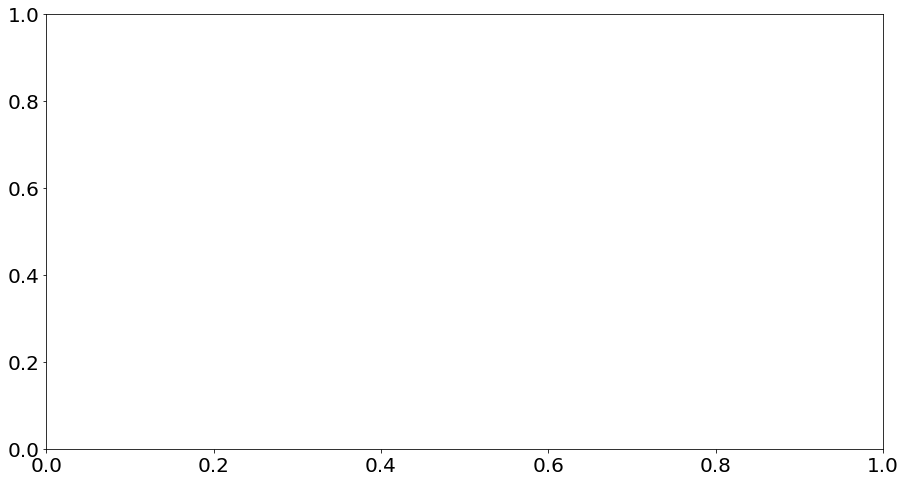

In [12]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(scaling, rval, yerr=drval, fmt="o")
plt.axhline(y=-44.55418088, color='black', linestyle='dotted')
plt.axvline(x=1.0, color='black', linestyle='dotted')
plt.axvline(x=1.0011, color='red', linestyle='dotted')
plt.xlabel('Scaling factor',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.ylim(-42,-37)
plt.show()
#plt.savefig('run2_caloscan_R.jpg')

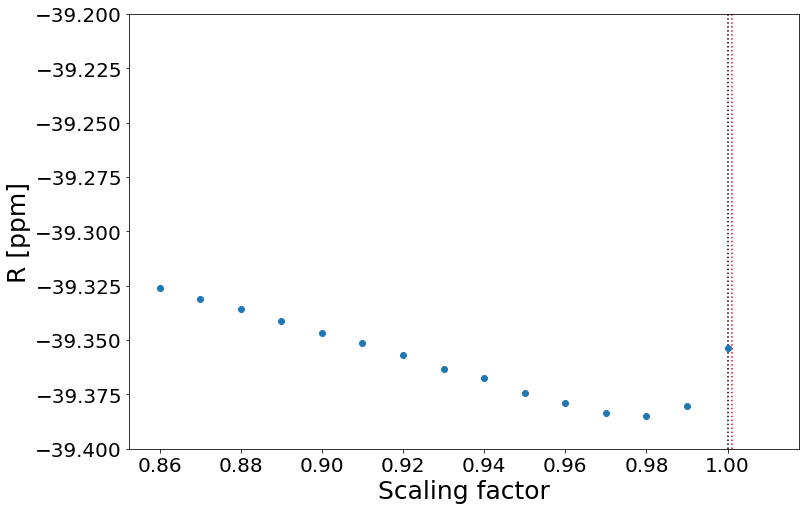

In [60]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(scaling, rval, yerr=0, fmt="o")
plt.axhline(y=-44.55418088, color='black', linestyle='dotted')
plt.axvline(x=1.0, color='black', linestyle='dotted')
plt.axvline(x=1.0011, color='red', linestyle='dotted')
plt.xlabel('Scaling factor',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.ylim(-39.4,-39.2)
plt.show()
plt.rcParams["axes.formatter.useoffset"] = False

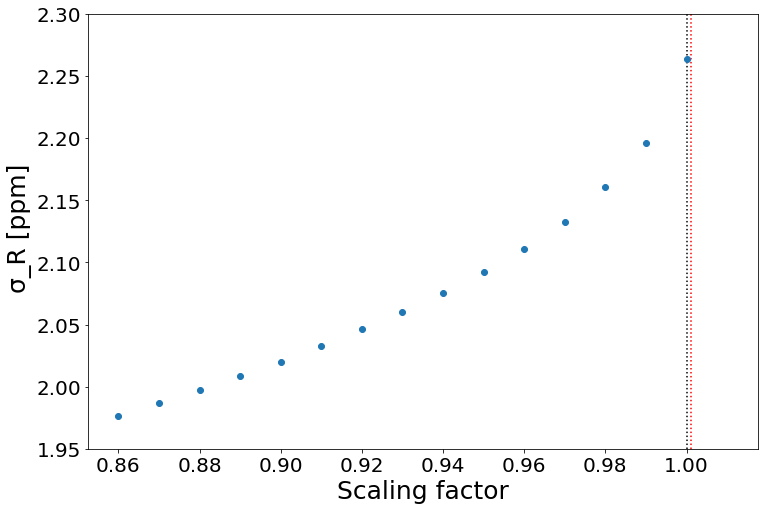

In [65]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(scaling, drval, yerr=0, fmt="o")
plt.axhline(y=0.49154985, color='black', linestyle='dotted')
plt.axvline(x=1.0, color='black', linestyle='dotted')
plt.axvline(x=1.0011, color='red', linestyle='dotted')
plt.xlabel('Scaling factor',fontsize=25)
plt.ylabel(' σ_R [ppm]',fontsize=25)
plt.ylim(1.95,2.3)
plt.show()

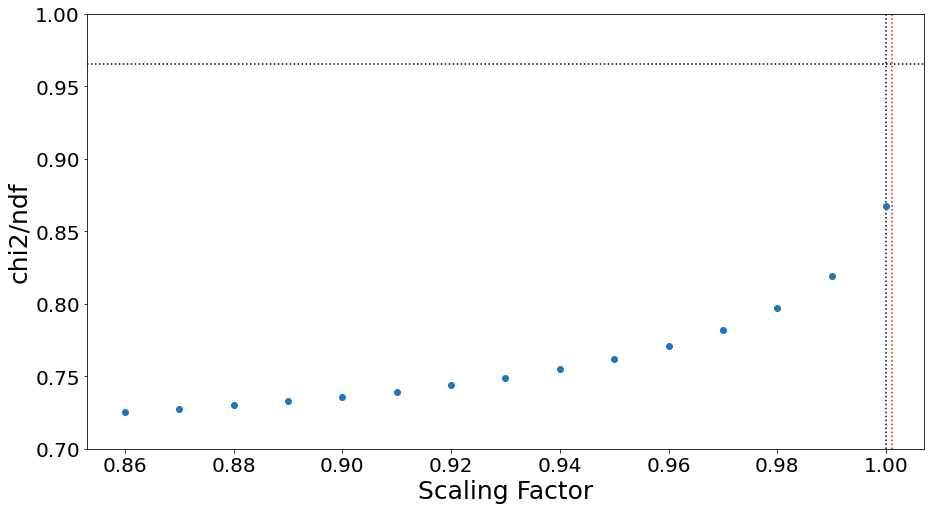

In [68]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(scaling, red_chi2, yerr=0, fmt="o")
plt.axhline(y=0.96519427, color='black', linestyle='dotted')
plt.axhline(y=1.0, color='green', linestyle='dotted')
plt.axvline(x=1.0, color='black', linestyle='dotted')
plt.axvline(x=1.0011, color='red', linestyle='dotted')
plt.xlabel('Scaling Factor',fontsize=25)
plt.ylabel('chi2/ndf',fontsize=25)
plt.ylim(0.7,1.0)
plt.show()

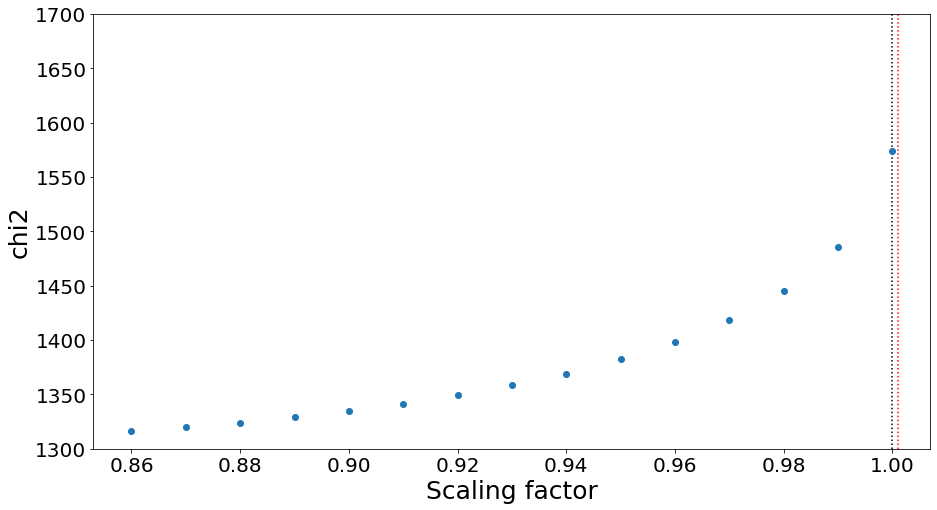

In [72]:
plt.figure(figsize=(15,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(scaling, red_chi2*(fit_range-len(pars2)), yerr=0, fmt="o")
plt.axhline(y=1748.93201648, color='black', linestyle='dotted')
plt.axhline(y=1812, color='green', linestyle='dotted')
plt.axvline(x=1.0, color='black', linestyle='dotted')
plt.axvline(x=1.0011, color='red', linestyle='dotted')
plt.xlabel('Scaling factor',fontsize=25)
plt.ylabel('chi2',fontsize=25)
plt.ylim(1300,1700)
plt.show()

In [73]:
rval

array([-39.32597981, -39.3310682 , -39.33565849, -39.34101252,
       -39.34653535, -39.35146978, -39.35672407, -39.36318754,
       -39.36758278, -39.37427936, -39.37913567, -39.38372718,
       -39.38509199, -39.38038659, -39.35350697,   0.        ])

In [74]:
drval

array([1.97605074e+000, 1.98646751e+000, 1.99730780e+000, 2.00867856e+000,
       2.02014012e+000, 2.03273807e+000, 2.04614958e+000, 2.06007153e+000,
       2.07560952e+000, 2.09233323e+000, 2.11051351e+000, 2.13278541e+000,
       2.16073942e+000, 2.19644308e+000, 2.26365221e+000, 1.10323749e-312])

In [75]:
red_chi2

array([0.72558155, 0.72759634, 0.72994412, 0.73267138, 0.7358364 ,
       0.73951413, 0.7438026 , 0.74883471, 0.75479629, 0.76196039,
       0.77075372, 0.78190496, 0.79683968, 0.81911803, 0.86766191,
              nan])

In [76]:
red_chi2*(fit_range-len(pars2))

array([1316.20492803, 1319.85976861, 1324.11863974, 1329.06588952,
       1334.80723271, 1341.47864004, 1349.25791241, 1358.38616583,
       1369.20047001, 1382.19615279, 1398.1472423 , 1418.37559457,
       1445.46717679, 1485.88010743, 1573.9387138 ,           nan])